In [1]:
import xarray as xr
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt 
from matplotlib import ticker, cm
import matplotlib.cm as mcm
from matplotlib.ticker import MaxNLocator
import matplotlib.colors as colors
import matplotlib.dates as mdates
from matplotlib.colors import LogNorm
from matplotlib.colors import Normalize
from matplotlib.ticker import FuncFormatter
jet = mcm.get_cmap('jet') if isinstance(mcm.get_cmap('jet'), str) else mcm.get_cmap('jet')
import netCDF4 as nc
import cartopy.crs as ccrs # CRS stands for "Coordinate reference systems" for map projection
from cartopy.crs import PlateCarree
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter 
import matplotlib.gridspec as gridspec
import os 
import glob
import re
import nc_time_axis
import time 

def scientific_formatter(x, pos):
    if x == 0:
        return "$0$"
    exponent = int(np.floor(np.log10(x)))
    base = round(x / 10**exponent)
    if base == 1:
        return f"$10^{{{exponent}}}$"
    else:
        return f"${base} \\times 10^{{{exponent}}}$"


/tmp/ipykernel_208019/2713065812.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  jet = mcm.get_cmap('jet') if isinstance(mcm.get_cmap('jet'), str) else mcm.get_cmap('jet')


# File reading

## Algorithm output for SpE Events

In [2]:
WACCM_UL = 150
ds_months_ar = np.arange(0,3)   

win_Monthfolderstr = 'Dec-Feb'
win_ds_months = ['12','01','02']

spr_Monthfolderstr = 'Mar-May'
spr_ds_months = ['03','04','05']

sum_Monthfolderstr = 'Jun-Aug'
sum_ds_months = ['06','07','08']

aut_Monthfolderstr = 'Sep-Nov'
aut_ds_months = ['09','10','11']

run_name = 'Solar_Comp'

filename_append = '0.25sigma_2xMpza_1xpeak'     

#----------------------------------------------------------------------------------------

win_file_med = f'/resstore/b0243/Data/Sporadic_E/Solar_Med/SpE_Algorithm_Output_yr2000/Wuhu_IonTr_run_SpE_Output_{win_Monthfolderstr}_90-150km_{filename_append}.nc'
spr_file_med = f'/resstore/b0243/Data/Sporadic_E/Solar_Med/SpE_Algorithm_Output_yr2000/Wuhu_IonTr_run_SpE_Output_{spr_Monthfolderstr}_90-150km_{filename_append}.nc'
sum_file_med = f'/resstore/b0243/Data/Sporadic_E/Solar_Med/SpE_Algorithm_Output_yr2000/Wuhu_IonTr_run_SpE_Output_{sum_Monthfolderstr}_90-150km_{filename_append}.nc'
aut_file_med = f'/resstore/b0243/Data/Sporadic_E/Solar_Med/SpE_Algorithm_Output_yr2000/Wuhu_IonTr_run_SpE_Output_{aut_Monthfolderstr}_90-150km_{filename_append}.nc'

ds_medwin = xr.open_dataset(win_file_med, decode_times=False)
ds_medspr = xr.open_dataset(spr_file_med, decode_times=False)
ds_medsum = xr.open_dataset(sum_file_med, decode_times=False)
ds_medaut = xr.open_dataset(aut_file_med, decode_times=False)

#----------------------------------------------------------------------------------------

win_file_min = f'/resstore/b0243/Data/Sporadic_E/Solar_Min/SpE_Algorithm_Output_yr2000/SMin_SpE_Output_{win_Monthfolderstr}_90-150km_{filename_append}.nc'
spr_file_min = f'/resstore/b0243/Data/Sporadic_E/Solar_Min/SpE_Algorithm_Output_yr2000/SMin_SpE_Output_{spr_Monthfolderstr}_90-150km_{filename_append}.nc'
sum_file_min = f'/resstore/b0243/Data/Sporadic_E/Solar_Min/SpE_Algorithm_Output_yr2000/SMin_SpE_Output_{sum_Monthfolderstr}_90-150km_{filename_append}.nc'
aut_file_min = f'/resstore/b0243/Data/Sporadic_E/Solar_Min/SpE_Algorithm_Output_yr2000/SMin_SpE_Output_{aut_Monthfolderstr}_90-150km_{filename_append}.nc'

ds_minwin = xr.open_dataset(win_file_min, decode_times=False)
ds_minspr = xr.open_dataset(spr_file_min, decode_times=False)
ds_minsum = xr.open_dataset(sum_file_min, decode_times=False)
ds_minaut = xr.open_dataset(aut_file_min, decode_times=False)

#----------------------------------------------------------------------------------------

win_file_max = f'/resstore/b0243/Data/Sporadic_E/Solar_Max/SpE_Algorithm_Output_yr2000/SMax_SpE_Output_{win_Monthfolderstr}_90-150km_{filename_append}.nc'
spr_file_max = f'/resstore/b0243/Data/Sporadic_E/Solar_Max/SpE_Algorithm_Output_yr2000/SMax_SpE_Output_{spr_Monthfolderstr}_90-150km_{filename_append}.nc'
sum_file_max = f'/resstore/b0243/Data/Sporadic_E/Solar_Max/SpE_Algorithm_Output_yr2000/SMax_SpE_Output_{sum_Monthfolderstr}_90-150km_{filename_append}.nc'
aut_file_max = f'/resstore/b0243/Data/Sporadic_E/Solar_Max/SpE_Algorithm_Output_yr2000/SMax_SpE_Output_{aut_Monthfolderstr}_90-150km_{filename_append}.nc'

ds_maxwin = xr.open_dataset(win_file_max, decode_times=False)
ds_maxspr = xr.open_dataset(spr_file_max, decode_times=False)
ds_maxsum = xr.open_dataset(sum_file_max, decode_times=False)
ds_maxaut = xr.open_dataset(aut_file_max, decode_times=False)

#----------------------------------------------------------------------------------------

os.chdir('/nobackup')
win_file_cli = f'/nobackup/cm21cmr/cli_cha_SpE_Output_{win_Monthfolderstr}_90-150km_{filename_append}.nc'
spr_file_cli = f'/nobackup/cm21cmr/cli_cha_SpE_Output_{spr_Monthfolderstr}_90-150km_{filename_append}.nc'
sum_file_cli = f'/nobackup/cm21cmr/cli_cha_SpE_Output_{sum_Monthfolderstr}_90-150km_{filename_append}.nc'
aut_file_cli = f'/nobackup/cm21cmr/cli_cha_SpE_Output_{aut_Monthfolderstr}_90-150km_{filename_append}.nc'

ds_cliwin = xr.open_dataset(win_file_cli, decode_times=False)
ds_clispr = xr.open_dataset(spr_file_cli, decode_times=False)
ds_clisum = xr.open_dataset(sum_file_cli, decode_times=False)
ds_cliaut = xr.open_dataset(aut_file_cli, decode_times=False)

#----------------------------------------------------------------------------------------

ds_clisum

<xarray.Dataset>
Dimensions:                    (lev: 126, lev_sl: 23, time: 336, lat: 96,
                                latsl: 36, lon: 144, LT: 48, LT_L: 144,
                                timesl: 2, mth: 3)
Coordinates:
  * lev                        (lev) float64 4.055e-10 5.207e-10 ... 970.6 992.6
  * lev_sl                     (lev_sl) float64 5.418e-06 6.956e-06 ... 0.001329
  * time                       (time) float64 0.0 1.0 2.0 ... 333.0 334.0 335.0
  * lat                        (lat) float64 -90.0 -88.11 -86.21 ... 88.11 90.0
  * latsl                      (latsl) float64 -87.5 -82.5 -77.5 ... 82.5 87.5
  * lon                        (lon) float64 0.0 2.5 5.0 ... 352.5 355.0 357.5
  * LT                         (LT) float64 0.0 0.5 1.0 1.5 ... 22.5 23.0 23.5
  * LT_L                       (LT_L) float64 0.0 0.1667 0.3333 ... 23.67 23.83
  * timesl                     (timesl) float64 0.0 1.0
  * mth                        (mth) float64 6.0 7.0 8.0
Data variables: (12/29)
    Zavg_sl                    (lev_sl) float64 ...
    altavg                     (lev) float64 ...
    altavg_sl                  (lev_sl) float64 ...
    times_str_min              (mth, timesl) object ...
    times_str_max              (mth, timesl) object ...
    SpEsns_Occ_Freq_lat        (lat) float64 ...
    ...                         ...
    Mptdens_nsavg              (lev_sl, lat, lon, timesl, mth) float64 ...
    Mptdens_avv1_b_5d          (lev_sl, latsl, timesl, mth) float64 ...
    Mptdens_std                (lev_sl, lat, LT_L, timesl, mth) float64 ...
    Mptdens_avg                (lev_sl, lat, LT_L, timesl, mth) float64 ...
    SpEs_freq_time             (lev_sl, lat, LT_L, timesl, mth) float64 ...
    SpEsns_freq_time           (lev_sl, lat, lon, timesl, mth) float64 ...

## Raw datasets for temp, chemical species, wind etc

In [3]:
# define function which computes monthly / seasonal averages of a given variable 
def process_nc_files(file_pattern, regex, var):
    
    # Find and group files by month
    file_paths = sorted(glob.glob(file_pattern))
    files_by_month = {}
    monthly_averages = {}
    seasonal_averages = {season: [] for season in ["spring", "summer", "autumn", "winter"]}

    for file_path in file_paths:
        match = re.search(regex, file_path)
        if match:
            month = int(match.group(1))  # Extract month
            files_by_month.setdefault(month, []).append(file_path)
        else:
            print(f"Skipping file with unexpected format: {file_path}")

    # Compute monthly averages
    for month, files in files_by_month.items():
        print(f"Processing month {month} with {len(files)} files.")
        ds = xr.open_mfdataset(files, combine='by_coords')
        if var in ds:
            monthly_averages[month] = ds[var].mean(dim='time')
        else:
            print(f"Variable {var} not found in files for month {month}.")
        ds.close()

    # Compute seasonal averages
    season_months = {"spring": [3, 4, 5], "summer": [6, 7, 8], "autumn": [9, 10, 11], "winter": [12, 1, 2]}
    for season, months in season_months.items():
        seasonal_data = [monthly_averages[month] for month in months if month in monthly_averages]
        if seasonal_data:
            seasonal_averages[season] = sum(seasonal_data) / len(seasonal_data)

    # Print summary
    print("Monthly Averages:", list(monthly_averages.keys()))
    print("Seasonal Averages:", list(seasonal_averages.keys()))

    # Create a list to hold monthly DataArrays
    monthly_data = []
    for month in range(1, 13):  # Loop through months 1 to 12
        if month in monthly_averages:
            da = monthly_averages[month]
            da = da.expand_dims(dim={'month': [month]})  # Add a 'month' dimension
            monthly_data.append(da)
        else:
            if len(monthly_data) > 0:
                template = monthly_data[0]
                nan_da = xr.full_like(template, np.nan).expand_dims(dim={'month': [month]})
                monthly_data.append(nan_da)

    # Combine all monthly DataArrays along the 'month' dimension
    result = xr.concat(monthly_data, dim='month')

    # change 'lev' to 'altavg' / km based on ds_medsum
    result = result.assign_coords(altavg=ds_medsum['altavg']).swap_dims({'lev':'altavg'})

    # Check the resulting DataArray
    print(result)
    return result


In [4]:
  # Replace with your desired variable name 
run_name = 'Solar Med' # OR # 'Solar Med'
                            # 'Solar Max'
                            # 'Solar Min'
                            # 'Climate Change' 

if run_name == 'Solar Med':
    file_pattern = '/resstore/b0243/Data/Sporadic_E/Solar_Med/archive_yr2000/*.nc'
    regex = r'.*h2\.0001-(\d{2})-(\d{2})-\d{5}\.nc'

elif run_name == 'Solar Max':
    file_pattern = '/resstore/b0243/Data/Sporadic_E/Solar_Max/archive_yr2000/atm/hist/*.nc'
    regex = r'.*h1\.0001-(\d{2})-(\d{2})-\d{5}\.nc'

elif run_name == 'Solar Min':
    file_pattern = '/resstore/b0243/Data/Sporadic_E/Solar_Min/archive_yr2000/atm/hist/*.nc'
    regex = r'.*h1\.0001-(\d{2})-(\d{2})-\d{5}\.nc'

elif run_name == 'Climate Change':
    file_pattern = '/resstore/b0243/Data/earfw/FX2100f19f19mg16NaFeMgiontransport/hist/*.nc'
    regex = r'.*h2\.2100-(\d{2})-(\d{2})-\d{5}\.nc'


ds_medT = process_nc_files(file_pattern, regex, 'V')

Skipping file with unexpected format: /resstore/b0243/Data/Sporadic_E/Solar_Med/archive_yr2000/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport.cam.h0.0001-01.nc
Skipping file with unexpected format: /resstore/b0243/Data/Sporadic_E/Solar_Med/archive_yr2000/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport.cam.h0.0001-02.nc
Skipping file with unexpected format: /resstore/b0243/Data/Sporadic_E/Solar_Med/archive_yr2000/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport.cam.h0.0001-03.nc
Skipping file with unexpected format: /resstore/b0243/Data/Sporadic_E/Solar_Med/archive_yr2000/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport.cam.h0.0001-04.nc
Skipping file with unexpected format: /resstore/b0243/Data/Sporadic_E/Solar_Med/archive_yr2000/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport.cam.h0.0001-05.nc
Skipping file with unexpected format: /resstore/b0243/Data/Sporadic_E/Solar_Med/archive_yr2000/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport.cam.h0.0001-06.n

In [5]:
run_name = 'Climate Change' # OR # 'Solar Med'
                            # 'Solar Max'
                            # 'Solar Min'
                            # 'Climate Change' 

if run_name == 'Solar Med':
    file_pattern = '/resstore/b0243/Data/Sporadic_E/Solar_Med/archive_yr2000/*.nc'
    regex = r'.*h2\.0001-(\d{2})-(\d{2})-\d{5}\.nc'

elif run_name == 'Solar Max':
    file_pattern = '/resstore/b0243/Data/Sporadic_E/Solar_Max/archive_yr2000/atm/hist/*.nc'
    regex = r'.*h1\.0001-(\d{2})-(\d{2})-\d{5}\.nc'

elif run_name == 'Solar Min':
    file_pattern = '/resstore/b0243/Data/Sporadic_E/Solar_Min/archive_yr2000/atm/hist/*.nc'
    regex = r'.*h1\.0001-(\d{2})-(\d{2})-\d{5}\.nc'

elif run_name == 'Climate Change':
    file_pattern = '/resstore/b0243/Data/earfw/FX2100f19f19mg16NaFeMgiontransport/hist/*.nc'
    regex = r'.*h2\.2100-(\d{2})-(\d{2})-\d{5}\.nc'


ds_cliT = process_nc_files(file_pattern, regex, 'V')

Skipping file with unexpected format: /resstore/b0243/Data/earfw/FX2100f19f19mg16NaFeMgiontransport/hist/FX2100f19f19mg16NaFeMgiontransport.cam.h0.2100-01.nc
Skipping file with unexpected format: /resstore/b0243/Data/earfw/FX2100f19f19mg16NaFeMgiontransport/hist/FX2100f19f19mg16NaFeMgiontransport.cam.h0.2100-02.nc
Skipping file with unexpected format: /resstore/b0243/Data/earfw/FX2100f19f19mg16NaFeMgiontransport/hist/FX2100f19f19mg16NaFeMgiontransport.cam.h0.2100-03.nc
Skipping file with unexpected format: /resstore/b0243/Data/earfw/FX2100f19f19mg16NaFeMgiontransport/hist/FX2100f19f19mg16NaFeMgiontransport.cam.h0.2100-04.nc
Skipping file with unexpected format: /resstore/b0243/Data/earfw/FX2100f19f19mg16NaFeMgiontransport/hist/FX2100f19f19mg16NaFeMgiontransport.cam.h0.2100-05.nc
Skipping file with unexpected format: /resstore/b0243/Data/earfw/FX2100f19f19mg16NaFeMgiontransport/hist/FX2100f19f19mg16NaFeMgiontransport.cam.h0.2100-06.nc
Skipping file with unexpected format: /resstore/b024

In [6]:
print(ds_cliT.dims)  # Shows the dimensions of the data
print(ds_cliT.coords)  # Shows all coordinates of the data

('month', 'altavg', 'lat', 'lon')
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
    lev      (altavg) float64 4.055e-10 5.207e-10 6.686e-10 ... 970.6 992.6
  * altavg   (altavg) float64 621.9 606.2 590.6 575.3 ... 0.9882 0.6342 0.4491


In [7]:
print(ds_cliT.dims)  # Shows the dimensions of the data
print(ds_cliT.coords)  # Shows all coordinates of the data

('month', 'altavg', 'lat', 'lon')
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
    lev      (altavg) float64 4.055e-10 5.207e-10 6.686e-10 ... 970.6 992.6
  * altavg   (altavg) float64 621.9 606.2 590.6 575.3 ... 0.9882 0.6342 0.4491


In [8]:
selected_month = 7  # Change this to plot other months
selected_alt = 100 # km
var = 'V' 

if selected_month in ds_cliT['month']:
    ds_cliT = ds_cliT.sel(month=selected_month, drop=False)
    
    if 'altavg' in ds_cliT.dims:
        ds_2dcliT = ds_cliT.sel(altavg=selected_alt, method='nearest')
    else:
        ds_2dcliT = ds_cliT    
   
    # Ensure no residual dimensions other than lat and lon
    ds_2dcliT= ds_2dcliT.mean(dim=[dim for dim in ds_2dcliT.dims if dim not in ['lat', 'lon']])
    
    # Extract latitude and longitude
    lat = ds_2dcliT['lat'].values
    lon = ds_2dcliT['lon'].values
    
    # Check dimensions
    print(f"Dimensions of {var}_month_2d:", ds_2dcliT.dims)
    print(f"Shape of {var}_month_2d:", ds_2dcliT.shape)

if selected_month in ds_medT['month']:
    ds_medT = ds_medT.sel(month=selected_month)
    
    if 'altavg' in ds_medT.dims:
        ds_2dmedT = ds_medT.sel(altavg=selected_alt, method='nearest')
    else:
        ds_2dmedT = ds_medT   
   
    # Ensure no residual dimensions other than lat and lon
    ds_2dmedT= ds_2dmedT.mean(dim=[dim for dim in ds_2dmedT.dims if dim not in ['lat', 'lon']])
    
    # Extract latitude and longitude
    lat = ds_2dmedT['lat'].values
    lon = ds_2dmedT['lon'].values
    
    # Check dimensions
    print(f"Dimensions of {var}_month_2d:", ds_2dmedT.dims)
    print(f"Shape of {var}_month_2d:", ds_2dmedT.shape)

Dimensions of V_month_2d: ('lat', 'lon')
Shape of V_month_2d: (96, 144)
Dimensions of V_month_2d: ('lat', 'lon')
Shape of V_month_2d: (96, 144)


In [9]:
ds_diff = (ds_2dcliT - ds_2dmedT)

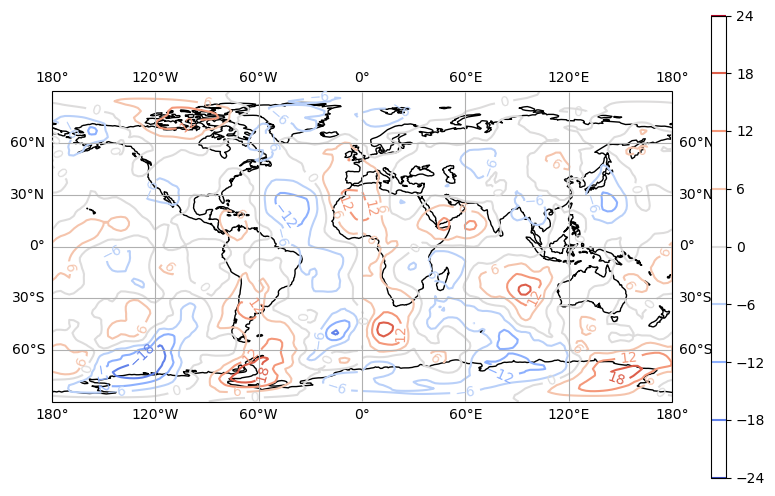

In [10]:
fig , ax = plt.subplots(figsize=(10,6), subplot_kw={'projection': ccrs.PlateCarree()})

contour = ax.contour(lon, 
                      lat, 
                      ds_diff, 
                      # colors='black',
                      cmap = plt.get_cmap('coolwarm'),
                      transform=ccrs.PlateCarree(), 
                      #levels=np.linspace(ds_diff.min().values, ds_diff.max().values, 20)
                     )
cbar = plt.colorbar(contour, ax=ax, orientation='vertical', pad=0.05, aspect=30)
ax.coastlines()
ax.gridlines(draw_labels=True,
             dms=True,
             x_inline=False,
             y_inline=False
            )
plt.clabel(contour, inline=True, fontsize=10)
plt.savefig(f'/home/home02/cm21cmr/Sporadic-E-Project/Figures/diff_{var}_alt_{selected_alt}_month_{selected_month}', dpi=400, bbox_inches='tight')
plt.show()

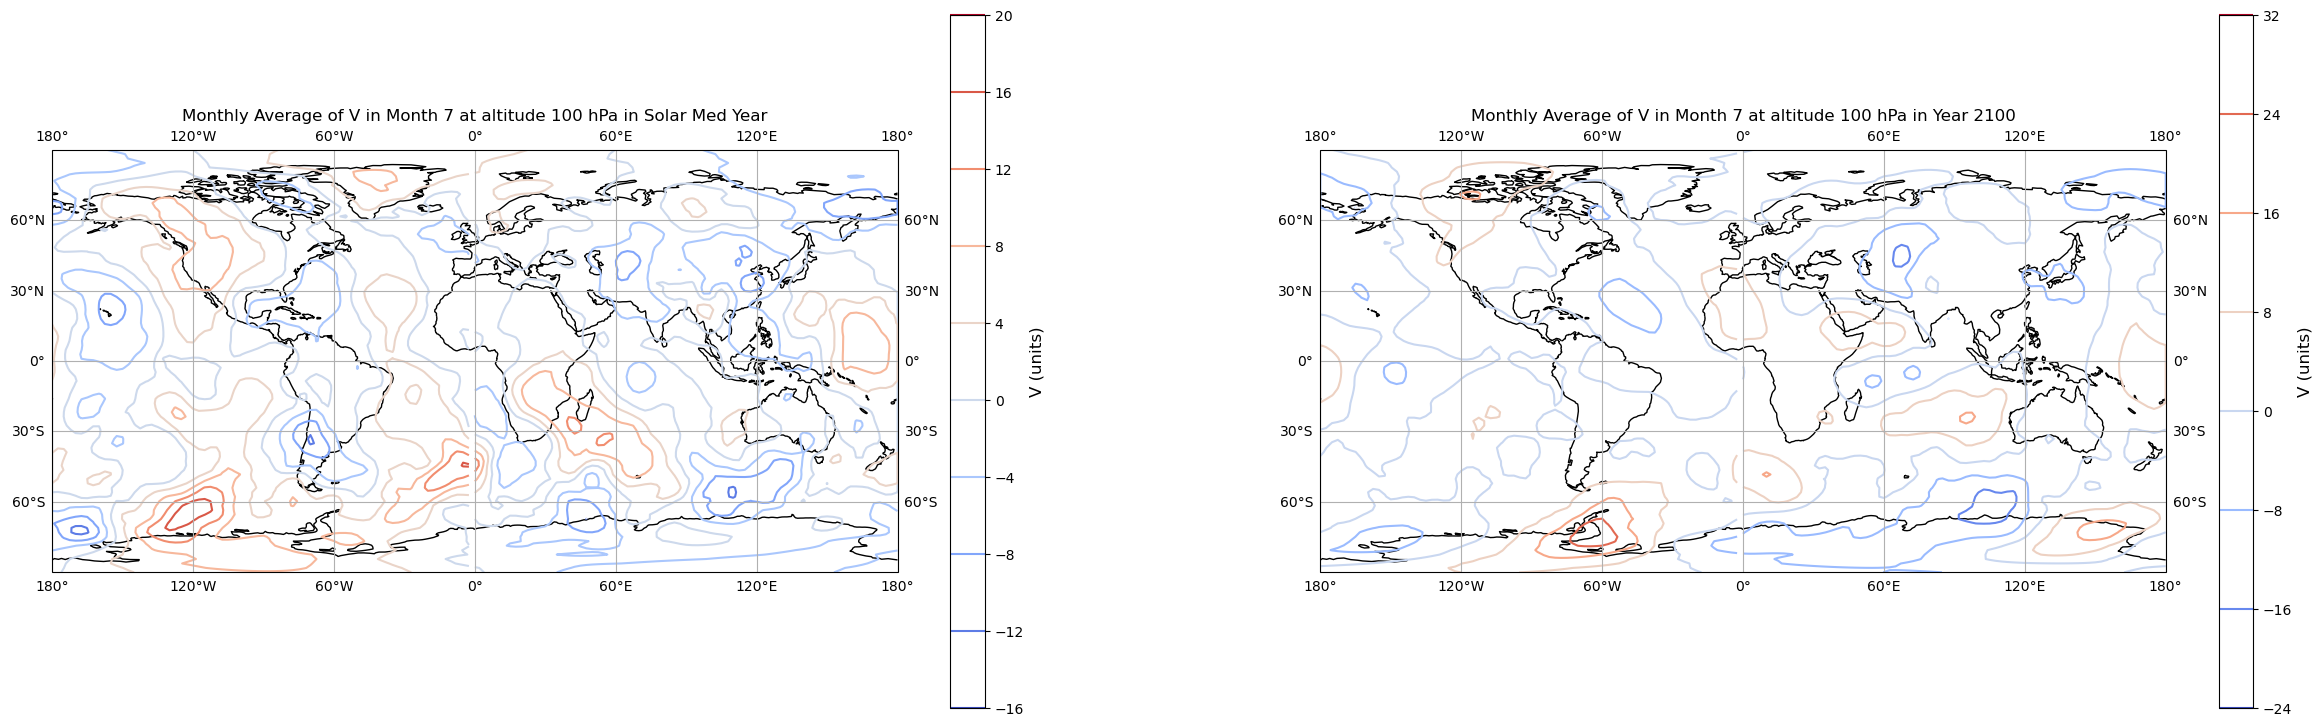

In [11]:
# Create a figure with Cartopy
fig, axes = plt.subplots(1,2,figsize=(30, 18), subplot_kw={'projection': ccrs.PlateCarree()})
    
# Contour plot of variable 
contour1 = axes[0].contour(lon, 
                      lat, 
                      ds_2dmedT, 
                      # colors='black',
                      cmap = plt.get_cmap('coolwarm'),
                      transform=ccrs.PlateCarree(), 
                      # levels=np.linspace(ds_2dmedT.min().values, ds_2dmedT.max().values, 20)
                           )
plt.clabel(contour, inline=True, fontsize=10)
cbar = plt.colorbar(contour1, ax=axes[0], orientation='vertical', shrink = 0.5) #, pad=0.05, aspect=30)
cbar.set_label(f'{var} (units)', fontsize=12)

contour2 = axes[1].contour(lon, 
                      lat, 
                      ds_2dcliT, 
                      # colors='black',
                      cmap = plt.get_cmap('coolwarm'),
                      transform=ccrs.PlateCarree(), 
                      # levels=np.linspace(ds_2dmedT.min().values, ds_2dmedT.max().values, 20)
                           )
plt.clabel(contour, inline=True, fontsize=10)
cbar = plt.colorbar(contour2, ax=axes[1], orientation='vertical',shrink = 0.5) #, pad=0.05, aspect=30)
cbar.set_label(f'{var} (units)', fontsize=12)
    
# Add coastlines and gridlines
axes[0].coastlines()
axes[0].gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
axes[1].coastlines()
axes[1].gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# Add titles
axes[0].set_title(f'Monthly Average of {var} in Month {selected_month} at altitude {selected_alt} hPa in Solar Med Year', 
             # fontsize=14
            )
axes[1].set_title(f'Monthly Average of {var} in Month {selected_month} at altitude {selected_alt} hPa in Year 2100', 
             # fontsize=14
                 )
plt.savefig(f'/home/home02/cm21cmr/Sporadic-E-Project/Figures/med_vs_cli_{var}_alt_{selected_alt}_month_{selected_month}', dpi=400, bbox_inches='tight')
plt.show()
 